In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import streamlit as st

In [8]:
  # Load data
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [12]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [9]:
df.apply(lambda x: x.unique())


City          [Ahmedabad, Aizawl, Amaravati, Amritsar, Benga...
Date          [2015-01-01, 2015-01-02, 2015-01-03, 2015-01-0...
PM2.5         [nan, 73.24, 83.13, 79.84, 94.52, 135.99, 178....
PM10          [nan, 141.54, 122.41, 116.32, 130.07, 138.31, ...
NO            [0.92, 0.97, 17.4, 1.7, 22.1, 45.41, 112.16, 8...
NO2           [18.22, 15.69, 19.3, 18.48, 21.42, 38.48, 40.6...
NOx           [17.15, 16.46, 29.7, 17.97, 37.76, 81.5, 130.7...
NH3           [nan, 26.64, 25.63, 29.16, 28.95, 28.41, 23.98...
CO            [0.92, 0.97, 17.4, 1.7, 22.1, 45.41, 112.16, 8...
SO2           [27.64, 24.55, 29.07, 18.59, 39.33, 45.76, 32....
O3            [133.36, 34.06, 30.7, 36.08, 39.31, 46.51, 33....
Benzene       [0.0, 3.68, 6.8, 4.43, 7.01, 5.42, 2.41, 9.45,...
Toluene       [0.02, 5.5, 16.4, 10.14, 18.89, 10.83, 0.0, 0....
Xylene        [0.0, 3.77, 2.25, 1.0, 2.78, 1.93, 7.88, 12.5,...
AQI           [nan, 209.0, 328.0, 514.0, 782.0, 914.0, 660.0...
AQI_Bucket    [nan, Poor, Very Poor, Sev

In [11]:
for col in df.columns:
    print(f"{col} ➜ {df[col].nunique()} unique values")
    print(df[col].unique(), "\n")


City ➜ 26 unique values
['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam'] 

Date ➜ 2009 unique values
['2015-01-01' '2015-01-02' '2015-01-03' ... '2020-06-29' '2020-06-30'
 '2020-07-01'] 

PM2.5 ➜ 11716 unique values
[  nan 73.24 83.13 ... 33.17 25.4  24.38] 

PM10 ➜ 12571 unique values
[   nan 141.54 122.41 ...  58.54  32.27  66.  ] 

NO ➜ 5776 unique values
[ 0.92  0.97 17.4  ... 29.35 30.16 18.55] 

NO2 ➜ 7404 unique values
[18.22 15.69 19.3  ... 58.99 52.1  53.59] 

NOx ➜ 8156 unique values
[17.15 16.46 29.7  ... 42.33 45.87  7.07] 

NH3 ➜ 5922 unique values
[  nan 26.64 25.63 ...  4.1  28.34 42.86] 

CO ➜ 1779 unique values
[ 0.92  0.97 17.4  ...  4.85  5.59  4.56] 

SO2 ➜ 4761 unique values
[27.64 24.55 29.07 ... 26.63 31.16 21.67] 


In [4]:
# size of data
df.shape

(29531, 16)

In [5]:
"""Type: Input (X)
Columns: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene

Type: Output (y)

For regression: AQI

For classification: AQI_Bucket

"""

'Type: Input (X)\nColumns: City, Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene\n\nType: Output (y)\n\nFor regression: AQI\n\nFor classification: AQI_Bucket\n\n'

In [6]:
# checking Missing values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
"""
STEP 2: Clean the Data
Handle missing values

Convert Date column to datetime

Convert numeric columns to proper types
"""

df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method='ffill', inplace=True)
print(df.head())



        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


C:\Users\User\AppData\Local\Temp\ipykernel_43252\1674772753.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
# checking Missing values
df.isnull().sum()

City             0
Date             0
PM2.5           27
PM10          1594
NO               0
NO2              0
NOx              0
NH3           2009
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI             28
AQI_Bucket      28
dtype: int64

In [15]:
#unique value
df['PM2.5'].value_counts()

PM2.5
34.97     1213
58.79      631
176.02     340
127.64     232
28.60      179
          ... 
177.20       1
100.48       1
113.93       1
88.70        1
178.33       1
Name: count, Length: 11716, dtype: int64

In [16]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


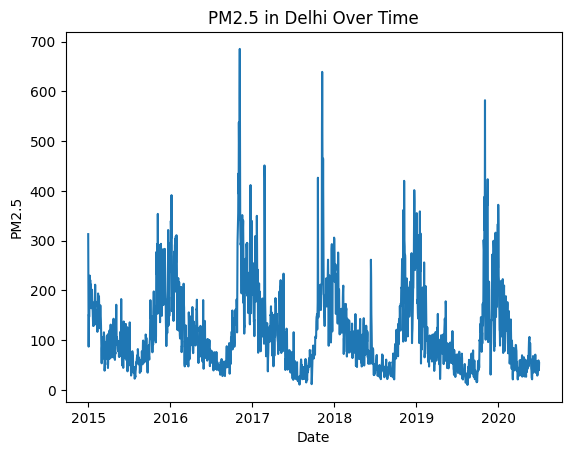

In [9]:
"""
 Explore the Data (EDA)
Use Seaborn and Matplotlib:
"""

sns.lineplot(x='Date', y='PM2.5', data=df[df['City'] == 'Delhi'])
plt.title("PM2.5 in Delhi Over Time")
plt.show()

In [10]:
"""
You can fill NaNs in the dataset using .fillna() before training:
"""

# Fill missing values with forward fill (or you can use mean, median, etc.)
X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].fillna(method='ffill')
y = df['AQI'].fillna(method='ffill')  # In case target also has NaNs


C:\Users\User\AppData\Local\Temp\ipykernel_43252\766372249.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_43252\766372249.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['AQI'].fillna(method='ffill')  # In case target also has NaNs


In [11]:
#Drop rows with missing values
df_cleaned = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'AQI']].dropna()

X = df_cleaned[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']]
y = df_cleaned['AQI']



In [12]:
"""
Build a Predictive Model
Use sklearn to predict AQI:
"""

X = df_cleaned[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']]
y = df_cleaned['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [13]:
#Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 2576.163764602174


C:\Users\User\AppData\Local\Temp\ipykernel_43252\4248245504.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
2025-06-05 14:41:30.471 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:41:30.472 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:41:30.473 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:41:30.474 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in ba

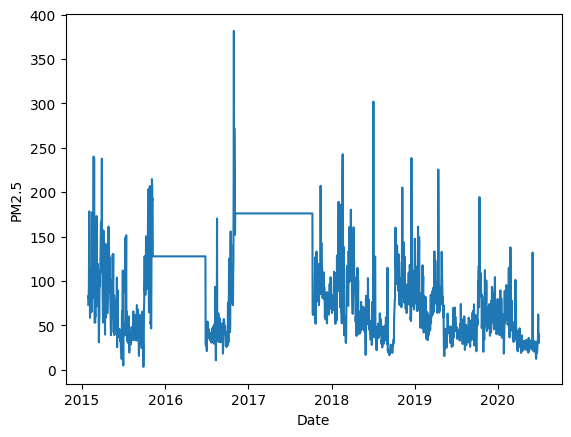

In [14]:
#Create a Frontend Using Streamlit
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data

df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method='ffill', inplace=True)

# Sidebar filters
city = st.sidebar.selectbox("Select a City", df['City'].unique())

# Filter data
city_data = df[df['City'] == city]

# Line plot
st.title(f"Air Quality Trends in {city}")
fig, ax = plt.subplots()
sns.lineplot(data=city_data, x='Date', y='PM2.5', ax=ax)
st.pyplot(fig)

# Model Prediction
st.header("AQI Prediction")
features = st.multiselect("Choose features for model", ['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO'])
if features:
    X = city_data[features]
    y = city_data['AQI']
    X = X.dropna()
    y = y.loc[X.index]
    
    if not X.empty and not y.empty:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        st.write(f"Model R² Score: {score:.2f}")
    else:
        st.warning("Not enough data for prediction.")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('city_day.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df.sort_values(by='Date', inplace=True)

# Forward fill missing values
df.fillna(method='ffill', inplace=True)

# Drop rows where 'AQI' is still missing
df.dropna(subset=['AQI'], inplace=True)

# Display basic information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 29529 entries, 10229 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29529 non-null  object        
 1   Date        29529 non-null  datetime64[ns]
 2   PM2.5       29529 non-null  float64       
 3   PM10        29529 non-null  float64       
 4   NO          29529 non-null  float64       
 5   NO2         29529 non-null  float64       
 6   NOx         29529 non-null  float64       
 7   NH3         29529 non-null  float64       
 8   CO          29529 non-null  float64       
 9   SO2         29529 non-null  float64       
 10  O3          29529 non-null  float64       
 11  Benzene     29529 non-null  float64       
 12  Toluene     29529 non-null  float64       
 13  Xylene      29529 non-null  float64       
 14  AQI         29529 non-null  float64       
 15  AQI_Bucket  29529 non-null  object        
dtypes: datetime64[ns](1), f

C:\Users\User\AppData\Local\Temp\ipykernel_15896\210898995.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


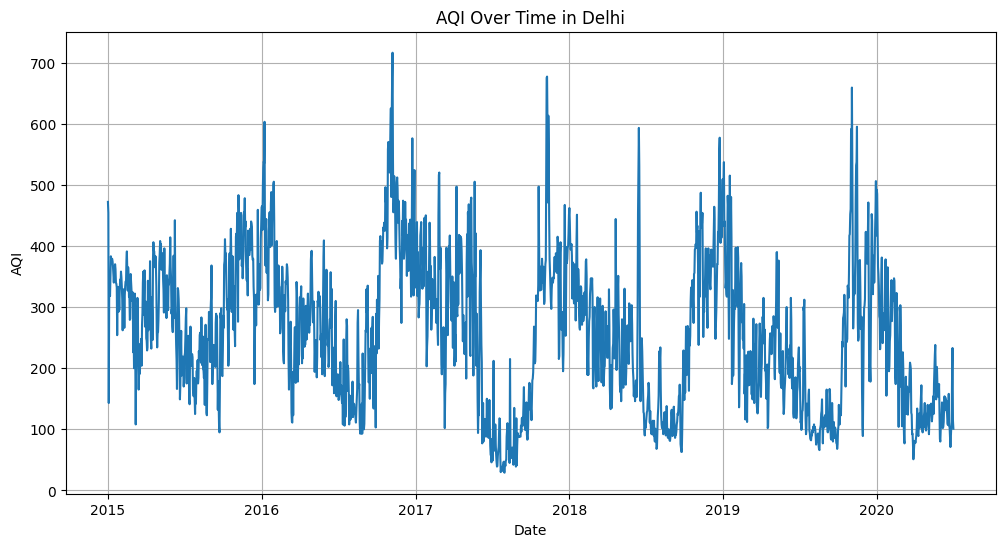

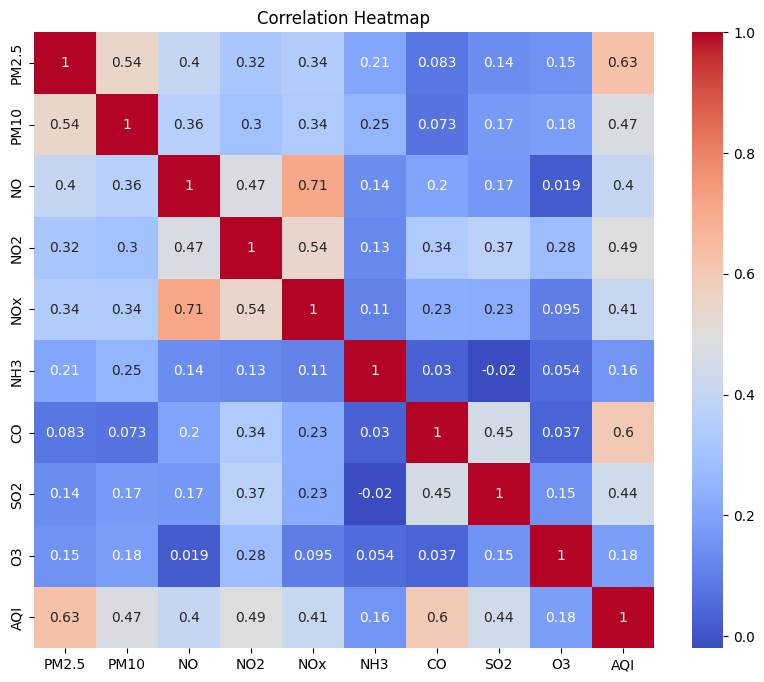

In [2]:
# Plot AQI over time for a specific city
city = 'Delhi'
df_city = df[df['City'] == city]

plt.figure(figsize=(12, 6))
plt.plot(df_city['Date'], df_city['AQI'])
plt.title(f'AQI Over Time in {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

# Correlation heatmap
corr = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target variable
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = df[features]
y = df['AQI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')



MAE: 37.54
MSE: 4808.15
RMSE: 69.34
R^2 Score: 0.77


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler    
import sklearn.datasets
from xgboost import XGBRegressor

In [6]:
#Model training xgboots

model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)


Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred = best_model.predict(X_test)

In [18]:
# Evaluate metrics
r2 = round(r2_score(y_test,y_pred),2)

print(f"R-squared(R2Score): {r2}")

R-squared(R2Score): 0.84


In [19]:
# ------------------------------
# 💡 Predictive System (Test Code)
# ------------------------------

# Function to predict AQI based on user input
def predict_aqi(pm25, pm10, no, no2, nox, nh3, co, so2, o3):
    input_data = np.array([[pm25, pm10, no, no2, nox, nh3, co, so2, o3]])
    prediction = model.predict(input_data)
    return round(prediction[0], 2)

# Example test case
print("\n--- AQI Prediction System ---")
test_prediction = predict_aqi(
    pm25=90, 
    pm10=160, 
    no=20, 
    no2=30, 
    nox=40, 
    nh3=10, 
    co=1.2, 
    so2=12, 
    o3=50
)
print(f"Predicted AQI: {test_prediction}")



--- AQI Prediction System ---
Predicted AQI: 191.49


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Uncomment below to allow user input from terminal
# print("\nEnter pollutant values to predict AQI:")
# pm25 = float(input("PM2.5: "))
# pm10 = float(input("PM10: "))
# no = float(input("NO: "))
# no2 = float(input("NO2: "))
# nox = float(input("NOx: "))
# nh3 = float(input("NH3: "))
# co = float(input("CO: "))
# so2 = float(input("SO2: "))
# o3 = float(input("O3: "))

# user_prediction = predict_aqi(pm25, pm10, no, no2, nox, nh3, co, so2, o3)
# print(f"\nPredicted AQI: {user_prediction}")


In [24]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,2.14,54.0,Satisfactory
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,0.50,2.14,101.0,Moderate
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,0.00,0.50,2.14,41.0,Good
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,3.31,0.33,0.46,50.0,Good


In [23]:
# Updated feature list
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = df[features]
y = df['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictive system function
def predict_aqi(pm25, pm10, no, no2, nox, nh3, co, so2, o3, benzene, toluene, xylene):
    input_data = np.array([[pm25, pm10, no, no2, nox, nh3, co, so2, o3, benzene, toluene, xylene]])
    prediction = model.predict(input_data)
    return round(prediction[0], 2)

# Predict using your input
predicted_aqi = predict_aqi(
    pm25=313.22,
    pm10=607.98,
    no=69.16,
    no2=36.39,
    nox=110.59,
    nh3=33.85,
    co=15.20,
    so2=9.25,
    o3=41.68,
    benzene=14.36,
    toluene=24.86,
    xylene=9.84
)

print("\n--- AQI Prediction Result ---")
print(f"Predicted AQI: {predicted_aqi}")



--- AQI Prediction Result ---
Predicted AQI: 644.44


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
# ------------------------------
# Final Test Prediction System
# ------------------------------

def predict_aqi(pm25, pm10, no, no2, nox, nh3, co, so2, o3, benzene, toluene, xylene):
    input_data = np.array([[pm25, pm10, no, no2, nox, nh3, co, so2, o3, benzene, toluene, xylene]])
    prediction = model.predict(input_data)
    return round(prediction[0], 2)

# ✅ Predict AQI using provided values
predicted_aqi = predict_aqi(
    pm25=22.00,
    pm10=34.00,
    no=1.50,
    no2=9.68,
    nox=6.40,
    nh3=8.45,
    co=0.59,
    so2=10.88,
    o3=29.15,
    benzene=0.10,
    toluene=0.50,
    xylene=2.14
)

print("\n--- AQI Prediction Result ---")
print(f"Predicted AQI: {predicted_aqi}")



--- AQI Prediction Result ---
Predicted AQI: 73.36


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\User\AppData\Local\Temp\ipykernel_15896\2760296044.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df['AQI'].resample('M').mean()


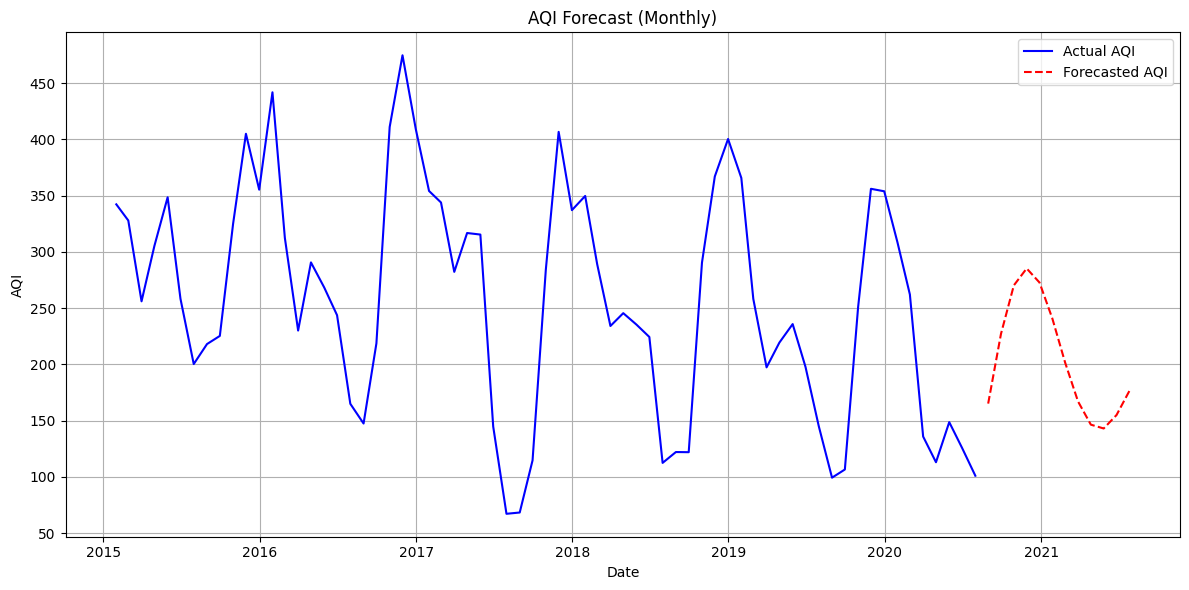

In [26]:
#pip install statsmodels matplotlib pandas
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load and preprocess data
df = pd.read_csv("city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Filter city if needed (e.g., Delhi)
df = df[df['City'] == 'Delhi']  # change city if needed
df = df[['Date', 'AQI']].dropna()

# Set date as index
df.set_index('Date', inplace=True)

# Resample to monthly average to smoothen (optional)
monthly_aqi = df['AQI'].resample('M').mean()

# Train ARIMA model
model = ARIMA(monthly_aqi, order=(2,1,2))  # You can tune this
model_fit = model.fit()

# Forecast for next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create future dates
last_date = monthly_aqi.index[-1]
future_dates = [last_date + timedelta(days=30*i) for i in range(1, forecast_steps+1)]

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_aqi, label='Actual AQI', color='blue')
plt.plot(future_dates, forecast, label='Forecasted AQI', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast (Monthly)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

